# DIP Lab 3: Basic Image Processing 2

### Task 1: Image Binarization using Threshold 

In [1]:
from PIL import Image, ImageDraw

def binarization(input_image,threshold_value,output_image):
    # Open Existing Image
    image = Image.open(input_image)
    # Convert to Greyscale and Binarize
    binarize = lambda x : 255 if x > threshold_value else 0
    image = image.convert('L').point(binarize, mode='1')
    image.save(output_image)
    
# Binarizing image with different threshold values
binarization('B1.png',140,'B1binarize-140.png')
binarization('B1.png',170,'B1binarize-170.png')
binarization('B1.png',128,'B1binarize-128.png')
binarization('B2.jpg',140,'B2binarize-140.jpg')
binarization('B2.jpg',170,'B2binarize-170.jpg')
binarization('B2.jpg',128,'B2binarize-128.jpg')
binarization('B3.jpg',140,'B3binarize-140.jpg')
binarization('B3.jpg',170,'B3binarize-170.jpg')
binarization('B3.jpg',128,'B3binarize-128.jpg')

### Task 2: Intensity Histogram from Grey-scale

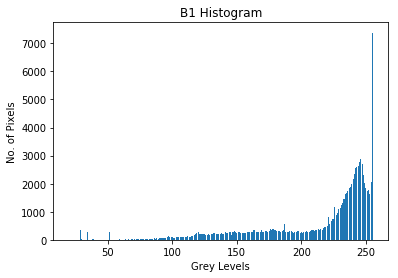

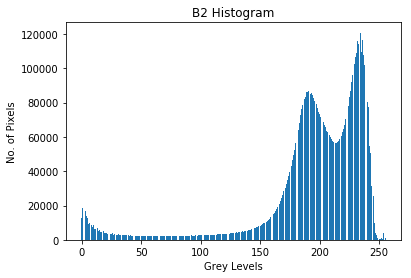

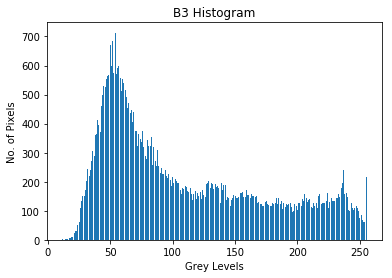

In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt

def plot_histogram(input_image):
    # Open Existing Image
    image = Image.open(input_image)
    # Convert to Greyscale
    image = image.convert('L')
    # Count no. of pixels for every grey level
    histogram = defaultdict(int)
    width, height = image.size
    for x in range(0,width):
        for y in range(0,height):
            pixel_value = image.getpixel((x,y))
            histogram[pixel_value] += 1
    # Sort the histogram according to keys
    lists = sorted(histogram.items())
    # Separate keys and values 
    x, y = zip(*lists)
    # Plot the Histogram
    plt.bar(x, y)
    plt.xlabel('Grey Levels')
    plt.ylabel('No. of Pixels')
    plt.title(input_image.split('.')[0] + ' Histogram')
    plt.show()

# Plotting histograms for different images
plot_histogram('B1.png')
plot_histogram('B2.jpg')
plot_histogram('B3.jpg')

### Task 3: Recursive XY-cut Algorithm

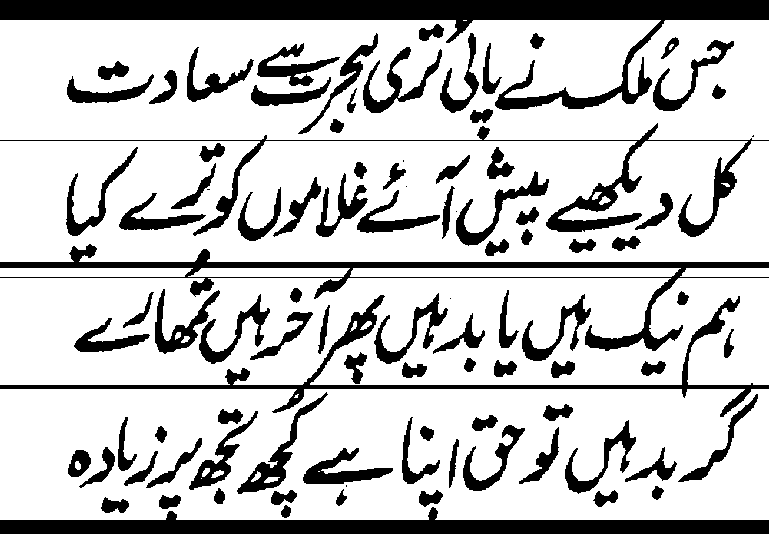

In [3]:
def image_segmentation(input_image,output_image):
    # Open the binarize image
    image=Image.open(input_image)
    # Compute height and width of Image
    width, height = image.size
    # Create Draw object on Image
    draw = ImageDraw.Draw(image)
    # Iterate pixels row-wise
    for y in range(0,height):
        bin_pix=defaultdict(int)
        for x in range(0,width):
            # Maintain count of black and white pixels in a row
            pixel_value = image.getpixel((x,y))
            bin_pix[pixel_value] += 1
        # Check for black pixels less than certain threshold
        if bin_pix[0] < 16:
            draw.line(((0,y),(width-1,y)))
    image.save(output_image)
    return image

# Binarize the image
binarization('XY-cutss.png',128,'XY-cutss-binarize-140.png')
# Perform Image Segmentation on Image
image_segmentation('XY-cutss-binarize-140.png','XY-cutss-segmented.png')